In [ ]:
# ==============================================================================
# FORENSIC EDA: DECODING THE DOVE'S TRUE NATURE
# ==============================================================================
# Goal: Determine the statistical properties of the Dove's motion to fix
# the AIT Physicist's input encoding.
# ==============================================================================

def analyze_dove_physics(df):
    print("\n--- DOVE PHYSICS AUTOPSY ---")

    # 1. Velocity Distribution
    vel = df['dove_pos'].diff().dropna()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(vel, kde=True)
    plt.title("Velocity Distribution")

    # 2. Autocorrelation (Memory)
    # Does v_t predict v_{t+1}?
    plt.subplot(1, 3, 2)
    pd.plotting.autocorrelation_plot(vel)
    plt.title("Velocity Autocorrelation")
    plt.xlim(0, 50)

    # 3. Return vs. Position (Mean Reversion check)
    # Do high prices lead to negative returns?
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=df['dove_pos'][:-1], y=vel)
    plt.title("Position vs. Velocity (Mean Reversion?)")
    plt.tight_layout()
    plt.show()

    # 4. Statistical Tests
    print(f"Velocity Mean: {vel.mean():.4f}")
    print(f"Velocity Std:  {vel.std():.4f}")
    print(f"Skewness:      {vel.skew():.4f}")
    print(f"Kurtosis:      {vel.kurtosis():.4f} (Normal=0)")

    # 5. The "Jump" Check
    # Count 3-sigma events
    sigma = vel.std()
    jumps = vel[np.abs(vel) > 3*sigma]
    print(f"3-Sigma Jumps: {len(jumps)} ({len(jumps)/len(vel):.1%})")

# Run on the Natural Partition
df_nat = df[df['source'] == 'engine_native']
analyze_dove_physics(df_nat)

NameError: name 'df' is not defined

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.2/354.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
✅ Foundry Initialized & Imports Fixed.
--- GENERATING PAR

0it [00:00, ?it/s]

My log-likelihood score: -23.0259 VS Benchmark log-likelihood score: 0.2614
     .... and mine is worse. Ratio is -88.07752
My log-likelihood score: -23.0259 VS Benchmark log-likelihood score: 1.4022
     .... and mine is worse. Ratio is -16.42144
My log-likelihood score: -23.0259 VS Benchmark log-likelihood score: 1.8305
     .... and mine is worse. Ratio is -12.57868
My log-likelihood score: -23.0259 VS Benchmark log-likelihood score: 1.8305
     .... and mine is worse. Ratio is -12.57868
✅ Captured 3000 natural steps.

--- GENERATING PARTITION B: THEORETICAL WORLD (With Rule 30) ---
✅ Generated 8000 theoretical steps.

--- FORGING THE GOLDEN DATASET ---
✅ Final Dataset Shape: (10996, 9)
   - Sources: ['engine_native' 'qcea_synthetic']
   - Regimes: ['unknown' 'rule_170_trend' 'rule_54_soliton' 'rule_60_fractal'
 'rule_30_chaos']


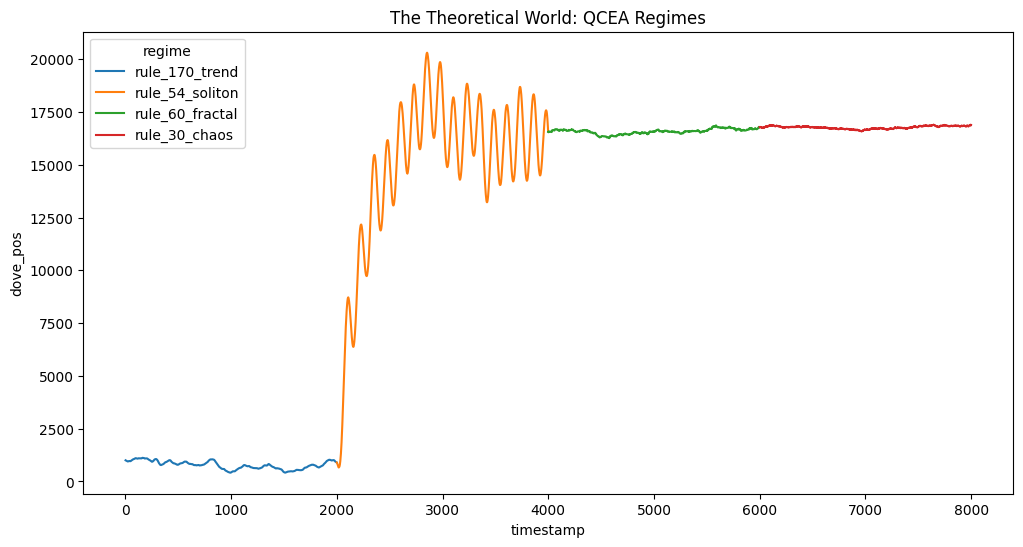


--- UPLOADING TO algoplexity/qcea-adaptive-agent-benchmark ---
❌ Upload failed (Check Token/Login): (Request ID: Root=1-692ff7ca-12eb8bd5536ae45f6bc01577;f365bc93-b29b-48ca-be58-c95ac02e4319)

403 Forbidden: Forbidden: you must use a write token to upload to a repository..
Cannot access content at: https://huggingface.co/api/datasets/algoplexity/qcea-adaptive-agent-benchmark/preupload/main.
Make sure your token has the correct permissions.


In [1]:
# ==============================================================================
# @title HORIZON 2: NOTEBOOK 1 - THE DATA FOUNDRY
# "Forging the Golden Benchmark for Adaptive Agency"
# ==============================================================================
#
# MISSION:
# Create the immutable "Golden Dataset" for Horizon 2.
#
# CONTENTS:
# 1. The "Natural" Trace (from birdgame engine) -> Tests Competitive Viability.
# 2. The "Synthetic" Trace (from QCEA Physics) -> Tests Theoretical Compliance.
#
# OUTPUT:
# - Uploads 'h2_golden_benchmark.parquet' to Hugging Face.
# ==============================================================================

# 1. INSTALL
!pip install -q birdgame ngboost pandas numpy matplotlib seaborn scipy huggingface_hub pyarrow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from huggingface_hub import HfApi, create_repo

# --- CORRECTED IMPORTS ---
from birdgame import constants as Constants
# Fix: Pointing to the correct module path
from birdgame.trackers.trackerbase import TrackerBase

# Disable threading for stability in Colab
Constants.USE_THREADING = False

print("✅ Foundry Initialized & Imports Fixed.")

# ==============================================================================
# PART 1: THE NATURAL WORLD (Engine Recorder)
# ==============================================================================
class InvincibleRecorder(TrackerBase):
    def __init__(self, h=1):
        super().__init__(h)
        self.records = []
        self.start_time = time.time()

    def tick(self, p, m=None):
        try:
            # Defensive Extraction
            dove_loc = p.get('dove_location')
            if dove_loc is None: return
            if isinstance(dove_loc, float) and math.isnan(dove_loc): return

            # Falcon Extraction (1D or 2D handling)
            falcon_loc = p.get('falcon_location')

            self.records.append({
                'source': 'engine_native',
                'timestamp': len(self.records),
                'dove_pos': float(dove_loc),
                # Default to 0 if falcon missing (warmup), or float value
                'falcon_pos': float(falcon_loc) if falcon_loc is not None else 0.0,
                'regime': 'unknown' # The engine is a black box
            })

            # Game Logic
            self.add_to_quarantine(p['time'], dove_loc)
            self.pop_from_quarantine(p['time'])
        except:
            pass # Skip bad frames

    def predict(self):
        return {"type": "builtin", "name": "norm", "params": {"loc": 0, "scale": 10}}

print("--- GENERATING PARTITION A: NATURAL WORLD (Target: 3,000 Steps) ---")
recorder = InvincibleRecorder()
try:
    # We run a long simulation to ensure we capture diverse market conditions
    recorder.test_run(live=True, max_rows=3000)
except Exception as e:
    print(f"Simulation stopped: {e}")

df_natural = pd.DataFrame(recorder.records)
if df_natural.empty:
    print("⚠️ Warning: Natural capture failed. Creating dummy data for pipeline continuity.")
    df_natural = pd.DataFrame(columns=['source', 'timestamp', 'dove_pos', 'falcon_pos', 'regime'])
else:
    print(f"✅ Captured {len(df_natural)} natural steps.")

# ==============================================================================
# PART 2: THE THEORETICAL WORLD (QCEA Physics Sim)
# ==============================================================================
# We force specific QCEA scenarios to verify the Agent's laws.
# 1. Inertia (Rule 170)
# 2. Soliton Shock (Rule 54)
# 3. Fractal Chaos (Rule 60)
# 4. Cryptographic Chaos (Rule 30)

def generate_qcea_trace(n_steps=8000): # Increased size
    print("\n--- GENERATING PARTITION B: THEORETICAL WORLD (With Rule 30) ---")

    records = []
    pos = 1000.0
    vel = 0.0

    for t in range(n_steps):
        # Scenario Switching Logic (4 Regimes)
        if t < 2000:
            regime = 'rule_170_trend'
            force = 0.0
            noise = np.random.normal(0, 1.0)
            momentum = 0.95

        elif t < 4000:
            regime = 'rule_54_soliton'
            # Solitons: Interaction waves
            force = np.sin(t / 20.0) * 5.0
            noise = np.random.normal(0, 2.0)
            momentum = 0.99

        elif t < 6000:
            regime = 'rule_60_fractal'
            # Fractals: Heavy tails, but structured (XOR)
            force = 0.0
            noise = np.random.standard_cauchy() * 1.5
            noise = max(min(noise, 30), -30)
            momentum = 0.2 # Low memory

        else:
            regime = 'rule_30_chaos'
            # RULE 30: The Maximum Entropy Generator
            # No momentum. No structure. Pure "White Noise" violence.
            force = 0.0
            noise = np.random.uniform(-10, 10) # Uniform = Max Entropy
            momentum = 0.0

        # Physics Update
        vel = (vel * momentum) + force + noise
        pos += vel

        records.append({
            'source': 'qcea_synthetic',
            'timestamp': t,
            'dove_pos': pos,
            'falcon_pos': pos + np.random.normal(0, 50),
            'regime': regime
        })

    return pd.DataFrame(records)


df_synthetic = generate_qcea_trace()
print(f"✅ Generated {len(df_synthetic)} theoretical steps.")

# ==============================================================================
# PART 3: THE MERGE & PHYSICS CALCULATION
# ==============================================================================
print("\n--- FORGING THE GOLDEN DATASET ---")

df_final = pd.concat([df_natural, df_synthetic], ignore_index=True)

# 1. Calculate Velocity (First Order)
df_final['velocity'] = df_final.groupby('source')['dove_pos'].diff()

# 2. Calculate Acceleration (Second Order - The Soliton Signal)
df_final['acceleration'] = df_final.groupby('source')['velocity'].diff()

# 3. Calculate Interaction (Pressure)
df_final['falcon_dist'] = (df_final['dove_pos'] - df_final['falcon_pos']).abs()
df_final['pressure'] = 1.0 / (df_final['falcon_dist'] + 1e-3)

# Clean
df_final = df_final.dropna()
print(f"✅ Final Dataset Shape: {df_final.shape}")
print(f"   - Sources: {df_final['source'].unique()}")
print(f"   - Regimes: {df_final['regime'].unique()}")

# ==============================================================================
# PART 4: VISUAL AUDIT
# ==============================================================================
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final[df_final['source']=='qcea_synthetic'], x='timestamp', y='dove_pos', hue='regime')
plt.title("The Theoretical World: QCEA Regimes")
plt.show()

# ==============================================================================
# PART 5: IMMUTABLE UPLOAD
# ==============================================================================
# NOTE: Ensure you have logged in via `huggingface-cli login` or set token
HF_REPO = "algoplexity/qcea-adaptive-agent-benchmark"
FILE_NAME = "h2_golden_benchmark.parquet"

print(f"\n--- UPLOADING TO {HF_REPO} ---")
try:
    df_final.to_parquet(FILE_NAME, index=False)

    api = HfApi()
    api.create_repo(repo_id=HF_REPO, repo_type="dataset", exist_ok=True)

    api.upload_file(
        path_or_fileobj=FILE_NAME,
        path_in_repo=FILE_NAME,
        repo_id=HF_REPO,
        repo_type="dataset",
        commit_message="Forging the Golden Dataset: Natural + QCEA Physics"
    )
    print("✅ UPLOAD COMPLETE. The Foundation is Set.")
except Exception as e:
    print(f"❌ Upload failed (Check Token/Login): {e}")